In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

In [4]:
from tensorflow.keras.models import load_model

model_path = r"D:\Internship Project\checkpoints\unet_epoch_20.h5"
model = load_model(model_path)



In [8]:
# ===== Step 2: Load Class Dictionary =====
class_dict_path = r"D:\Internship Project\class_dict.csv"
class_df = pd.read_csv(class_dict_path)
colormap = class_df[['r', 'g', 'b']].values.astype(np.uint8)
class_names = class_df['name'].tolist()

In [9]:
# ===== Step 3: Choose Test Image =====
test_image_path = r"D:\Internship Project\test\19849_sat.jpg"
image = cv2.imread(test_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
resized = cv2.resize(image, (256, 256))
input_tensor = np.expand_dims(resized / 255.0, axis=0)

In [10]:
# ===== Step 4: Predict Mask =====
pred = model.predict(input_tensor)[0]
pred_mask = np.argmax(pred, axis=-1).astype(np.uint8)
pred_rgb = colormap[pred_mask]

1/1 [==============================] - 2s 2s/step


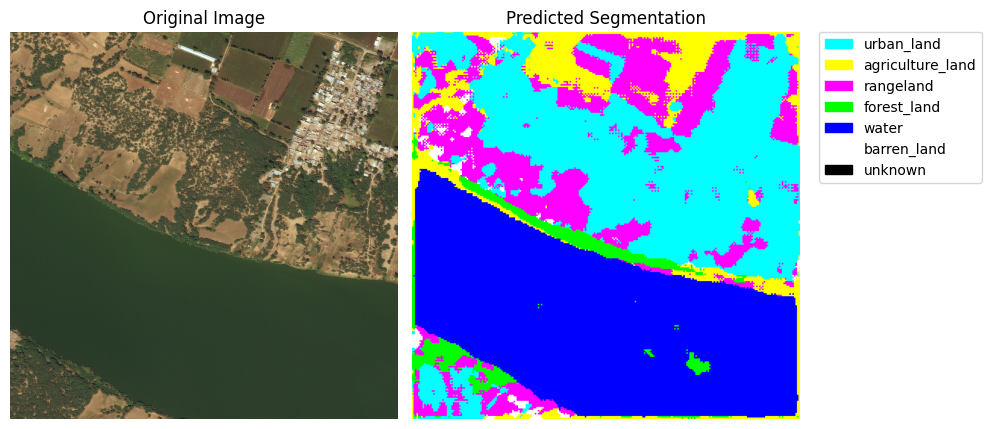

In [11]:
# ===== Step 5: Visualization with Legend =====
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(pred_rgb)
plt.title("Predicted Segmentation")
plt.axis('off')

# Add Legend
patches = [mpatches.Patch(color=np.array(colormap[i])/255.0, label=class_names[i]) for i in range(len(class_names))]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

# # ===== Step 6: Optional - Print Class Percentage Breakdown =====
# unique, counts = np.unique(pred_mask, return_counts=True)
# total_pixels = pred_mask.size

# print("📊 Class breakdown:")
# for idx, count in zip(unique, counts):
#     class_name = class_names[idx]
#     percent = (count / total_pixels) * 100
#     print(f"- {class_name}: {percent:.2f}%")

In [12]:
import pandas as pd
import numpy as np

# Load the class dictionary
class_dict_path = r"D:\\Internship Project\\class_dict.csv"
class_df = pd.read_csv(class_dict_path)

# Get RGB color values as NumPy array
colormap = class_df[['r', 'g', 'b']].values.astype(np.uint8)
